In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

In [2]:
#hide
!pip -q install fastbook
import fastbook
fastbook.setup_book()
     

In [3]:

from fastbook import *
from fastai.vision.widgets import *

In [4]:
fender = search_images_ddg("fender stratocaster")
gibson = search_images_ddg("gibson les paul")

In [5]:
fender_images = fender
len(fender_images), fender_images

(200,
 (#200) ['https://www.rollysguitars.co.uk/wp-content/uploads/2013/02/2006-Fender-American-Deluxe-Stratocaster-Olympic-White-Pearl-03.jpg','http://www.vintageandrare.com/uploads/products/56236/2188151/original.jpg','https://58eca9fdf76150b92bfa-3586c28d09a33a8c605ed79290ca82aa.ssl.cf3.rackcdn.com/fender-custom-shop-custom-classic-stratocaster-nos-black-solid-rosewood-neck-331932.jpg','https://cdn.shopify.com/s/files/1/1210/3886/products/fender-custom-shop-1963-relic-stratocaster-3-tone-sunburst-4.jpg?v=1481302787','https://shop.guitarpoint.de/media/images/info/Fender56StratSB14316_2.jpg','https://img.audiofanzine.com/images/u/product/normal/fender-standard-stratocaster-satin-2013-2014-186332.jpg','https://images.reverb.com/image/upload/s--J9U0440z--/f_auto,t_large/v1565301203/ycwglpdmkw9rdqifhwkv.jpg','https://shop.guitarpoint.de/media/images/info/Fender73StratSBRW515767_2.jpg','https://shop.guitarpoint.de/media/images/info/Fender74StratHTBlk580380_2.jpg','https://guitars.azureedg

In [6]:
gibson_images = gibson
len(gibson_images)

200

In [7]:
dest = "images/fender_images/fender.jpg"
download_url(fender_images[0], dest)

Path('images/fender_images/fender.jpg')

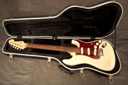

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

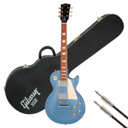

In [9]:
dest = "images/gibson_images/gibson.jpg"
download_url(gibson_images[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)

In [10]:
"""import shutil
shutil.rmtree("/kaggle/working/guitars")"""

'import shutil\nshutil.rmtree("/kaggle/working/guitars")'

In [11]:
# mkdir

guitar_types = ['fender stratocaster', 'gibson les paul', 'gibson flying v',
               'fender telecaster', "charvel guthrie govan signature"]
path = Path("guitars")
path.mkdir()

In [12]:

for o in guitar_types:
    dest = (path/o)
    dest.mkdir(exist_ok=False)
    results = search_images_ddg(f'{o}')
    download_images(dest, urls=results)




In [13]:
files = get_image_files(path)
files

(#978) [Path('guitars/fender stratocaster/c29f1e2d-abce-45cd-84ac-50b74b77c3e2.jpg'),Path('guitars/fender stratocaster/8a7ea79d-6fdb-47ac-b615-a552711d3354.jpg'),Path('guitars/fender stratocaster/37de7120-8ccc-458c-9ac4-dc7bcf119983.jpg'),Path('guitars/fender stratocaster/00322b71-451f-42d0-abba-a865327760be.jpg'),Path('guitars/fender stratocaster/48271b81-d91d-402b-afa4-a80f73463f5c.jpg'),Path('guitars/fender stratocaster/bbd05dff-fe40-478b-b95a-b316ac326234.jpg'),Path('guitars/fender stratocaster/c986db2d-a2af-4cb2-be16-1402a0dc9e31.jpg'),Path('guitars/fender stratocaster/59eec62c-5ebd-4f8b-a724-624cdafca31b.jpg'),Path('guitars/fender stratocaster/826f0cca-7807-4599-af4a-35b380ca1ded.jpg'),Path('guitars/fender stratocaster/7ffb3378-7158-468d-b83f-e2c5edd563f3.jpg')...]

In [14]:
failed = verify_images(files)
failed

(#8) [Path('guitars/fender stratocaster/c10c825c-e7a0-48ba-9c56-88e061fd421c.jpg'),Path('guitars/fender telecaster/b1a37e07-3247-4148-952e-0f13956941e4.jpg'),Path('guitars/charvel guthrie govan signature/86e78717-1495-4633-b5f0-c5fdcea2aab9.jpg'),Path('guitars/charvel guthrie govan signature/4bd396a0-26cb-45c8-a1ad-5b260a454895.jpg'),Path('guitars/charvel guthrie govan signature/9229b5d6-9abd-4b56-a57a-05147e6f9231.jpg'),Path('guitars/gibson les paul/b94fc90e-2c90-4355-9860-7c6cf86e58af.jpg'),Path('guitars/gibson les paul/998dfb6a-7fa3-440d-9627-007b1dc85a10.jpg'),Path('guitars/gibson les paul/b2a8c344-b560-4353-b053-6b0c7b987a84.jpg')]

In [15]:
failed.map(Path.unlink);

In [16]:

guitars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

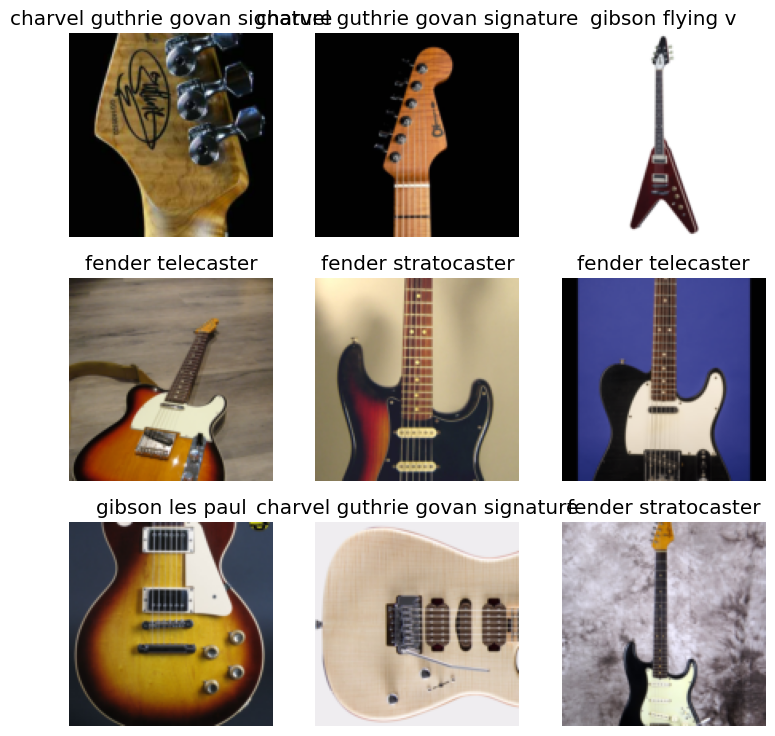

In [17]:
dls = guitars.dataloaders(path)
dls.show_batch()

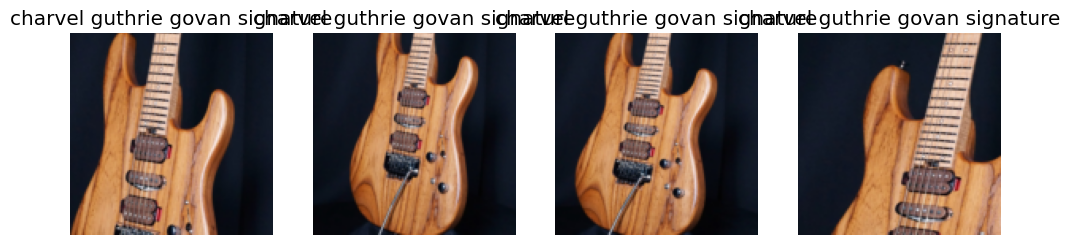

In [18]:
#resize
guitars = guitars.new(item_tfms = RandomResizedCrop(128,
                                                 min_scale = 0.2))
dls = guitars.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

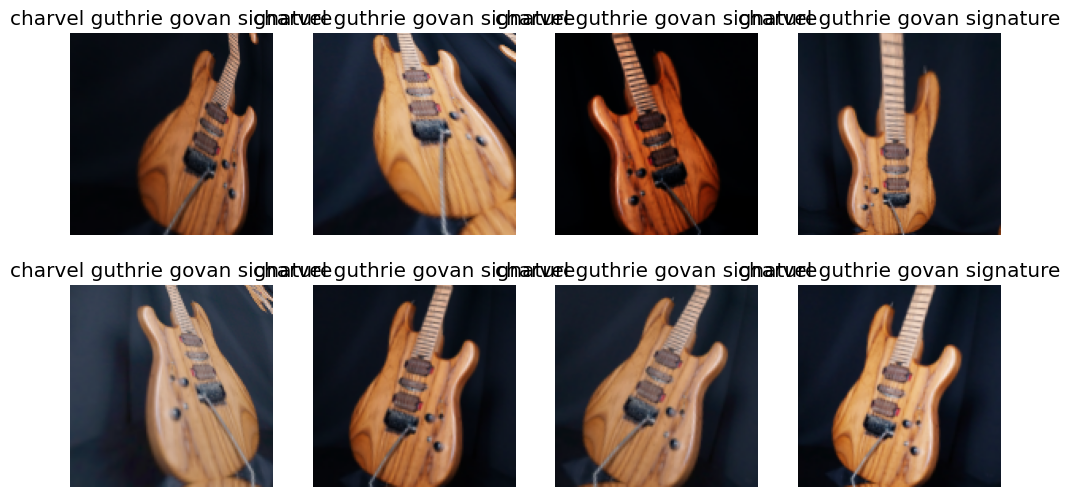

In [19]:
guitars = guitars.new(item_tfms=Resize(128),
                     batch_tfms = aug_transforms(mult=2))
dls = guitars.dataloaders(path)
dls.train.show_batch(max_n = 8, 
                    unique = True)


In [20]:
guitars = guitars.new(item_tfms=RandomResizedCrop(224, min_scale = 0.3),
                     batch_tfms = aug_transforms())

dls = guitars.dataloaders(path)


In [21]:
#learner
learn = vision_learner(dls, resnet18,
                      metrics = error_rate)

learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 160MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.882420,0.728367,0.226804,00:37


epoch,train_loss,valid_loss,error_rate,time
0,0.888595,0.400614,0.108247,00:37
1,0.733537,0.288433,0.087629,00:37
2,0.593165,0.198668,0.061856,00:37
3,0.521760,0.188725,0.051546,00:37


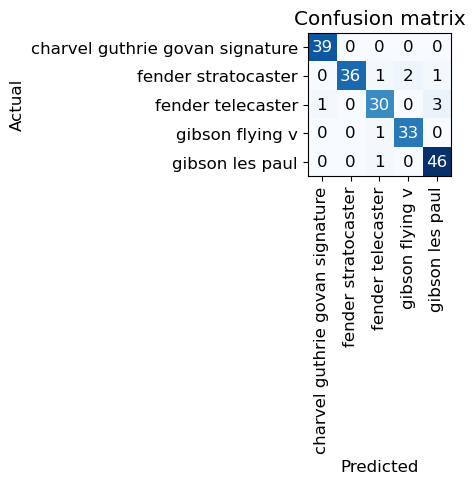

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [23]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [24]:
learn.export()

In [25]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

# Deployment

In [26]:
# load learner
#learn_inf = load_learner(path/'export.pkl')
!pip -q install gradio
import gradio as gr
categories = learn.dls.vocab

In [27]:
def classify_guitars(image):
    pred, idx,probs = learn.predict(image)
    return dict(categories, map(float,probs))

In [28]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()

intf = gr.Interface(fn = classify_guitars,inputs = image, outputs = label)
intf.launch(inline=False)

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://1f3ce1978b7ee753ca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
